In [2]:
import numpy as np
import matplotlib.colors
import matplotlib.pyplot as plt

import mandelbrot_MC as mb
from mandelbrot_MC_solvers import PureRandomSampling, LatinHypercubeSampling, OrthogonalSampling

# Mandelbrot set

In [ ]:
xRes = 500
yRes = 500

xVals = np.linspace(-2, 2, xRes)
yVals = np.linspace(-2, 2, yRes)

out = mb.mandelbrotDomain(xVals, yVals, 50, 2, 2)

fig, ax = plt.subplots()
ax.pcolormesh(xVals, yVals, out, norm=matplotlib.colors.LogNorm())
plt.show()


# Test Parameters

In [5]:
primes = np.asarray(mb.prime_sieve(300))
pSquares = np.square(primes)

SAMPLES       = pSquares[8:46]
ITERATIONS    = np.linspace(100, 5000, 40, dtype=int)
N_RUNS_STDERR = 10

In [ ]:
trueSolver = PureRandomSampling(294134962255585091400930992399399635150)
print(f"seed: {trueSolver.get_state()}")
TRUE_AREA = trueSolver.parallelMandelbrotArea(1000000, 10000)
print(f"Estimated trueArea: {TRUE_AREA}")

seed: 294134962255585091400930992399399635150
Estimated trueArea: 1.504


# Pure Random

In [4]:
solver = PureRandomSampling()

nIter = 20000
nSamples = 20000

area, points = solver.mandelbrotArea(nIter, nSamples, scatter=True)

d:\Documents\School\StochSim\Ass1\repo\mandelbrot_MC.py:19: RuntimeWarning: overflow encountered in power
  z = np.power(z, power) + val
d:\Documents\School\StochSim\Ass1\repo\mandelbrot_MC.py:19: RuntimeWarning: invalid value encountered in power
  z = np.power(z, power) + val


KeyboardInterrupt: 

In [24]:
fig, ax = plt.subplots()

pointsx, pointsy = zip(*points)

ax.scatter(pointsx, pointsy)
print(f"Area={area}")
plt.show()

In [ ]:
solver = PureRandomSampling()
print(f"seed: {solver.get_state()}")
experimentName = "PureRandom"

stdsPR, areasPR, areaPR = solver.iterSample_std(N_RUNS_STDERR, ITERATIONS, SAMPLES, trueArea=TRUE_AREA, verbose=True, parallel=True)
np.savetxt(experimentName + "_stds.out", stdsPR)
np.save(experimentName + "_areas", areasPR)

seed: 122093101107543952424297093105363616726
Run 1


d:\Documents\School\StochSim\Ass1\repo\mandelbrot_MC.py:19: RuntimeWarning: overflow encountered in power
  z = np.power(z, power) + val
d:\Documents\School\StochSim\Ass1\repo\mandelbrot_MC.py:19: RuntimeWarning: invalid value encountered in power
  z = np.power(z, power) + val


tRun: 6174.18
Run 2
tRun: 6148.77
Run 3
tRun: 6148.26
Run 4
tRun: 6148.12
Run 5
tRun: 6150.95
Run 6
tRun: 6166.82
Run 7
tRun: 6286.19
Run 8
tRun: 6468.08
Run 9
tRun: 6507.33
Run 10
tRun: 6267.60


ValueError: Expected 1D or 2D array, got 3D array instead

In [ ]:
stdsPR = np.loadtxt(experimentName + "_stds.out")

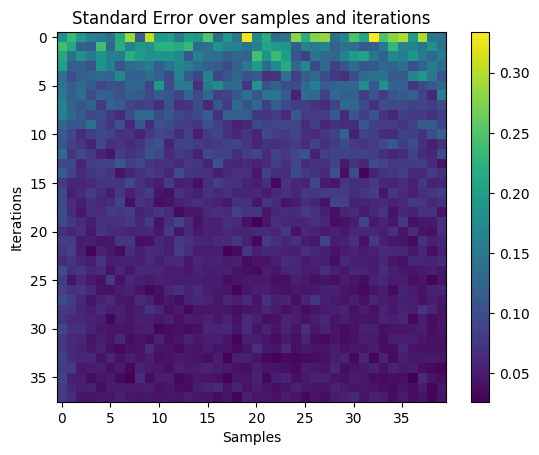

In [9]:
fig, ax = plt.subplots()

im = ax.imshow(stdsPR)

ax.set_xlabel("Samples")
# ax.set_xticks(samples)
ax.set_ylabel("Iterations")
# ax.set_yticks(iterations)
ax.set_title("Standard Error over samples and iterations")
fig.colorbar(im, ax = ax)
plt.show()

# Latin Hypercube

## Single Calculation

In [ ]:
solver = LatinHypercubeSampling(yDomain=(0,2))

nIter = 20000
nSamples = 20000

area, points = solver.mandelbrotArea(nIter, nSamples, scatter=True)

In [ ]:
fig, ax = plt.subplots()

pointsx, pointsy = zip(*points)

ax.scatter(pointsx, pointsy)
print(f"Area={area}")
plt.show()

## Standard Error

In [ ]:
solver = LatinHypercubeSampling()
print(f"seed: {solver.get_state()}")
experimentName = "LatinHypercube"

stdsLH, areasLH, areaLH = solver.iterSample_std(N_RUNS_STDERR, ITERATIONS, SAMPLES, trueArea=TRUE_AREA, verbose=True, parallel=True)
np.savetxt(experimentName + "_stds.out", stdsLH)
np.savetxt(experimentName + "_areas.out", areasLH)

In [ ]:
print(areaLH)
lognorm = False

fig, ax = plt.subplots()
im = ax.imshow(stdsLH)

ax.set_xlabel("Samples")
# ax.set_xticks(samples)
ax.set_ylabel("Iterations")
# ax.set_yticks(iterations)
ax.set_title("Standard Error over samples and iterations")
fig.colorbar(im, ax = ax)
plt.show()

# Orthogonal Sampling
*Can only use prime squared numbered amounts of samples*

## Single Calculation

In [ ]:
solver = OrthogonalSampling()

nIter = 20000
nSamples = 19321 # 139**2

area, points = solver.mandelbrotArea(nIter, nSamples, scatter=True)

In [ ]:
fig, ax = plt.subplots()

pointsx, pointsy = zip(*points)

ax.scatter(pointsx, pointsy)
print(f"Area={area}")
plt.show()

In [ ]:
solver = OrthogonalSampling()
print(f"seed: {solver.get_state()}")
experimentName = "Orthogonal"

stdsORT, areasORT, areaORT = solver.iterSample_std(N_RUNS_STDERR, ITERATIONS, SAMPLES, trueArea=TRUE_AREA, verbose=True, parallel=True)
np.savetxt(experimentName + "_stds.out", stdsORT)
np.savetxt(experimentName + "_areas.out", areasORT)

In [ ]:
print(areaORT)
lognorm = False

fig, ax = plt.subplots()
im = ax.imshow(stdsORT)

ax.set_xlabel("Samples")
# ax.set_xticks(samples)
ax.set_ylabel("Iterations")
# ax.set_yticks(iterations)
ax.set_title("Standard Error over samples and iterations")
fig.colorbar(im, ax = ax)
plt.show()

NameError: name 'stdsLH' is not defined

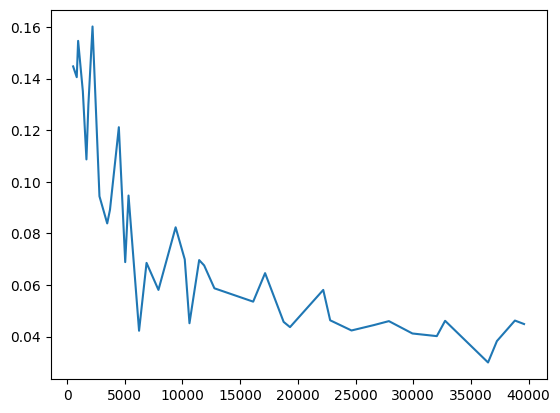

In [17]:
fig, ax = plt.subplots()
ax.plot(SAMPLES, stdsPR[:,-1])
ax.plot(ITERATIONS, stdsLH[-1,:])
ax.plot(ITERATIONS, stdsORT[-1,:])
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.plot(SAMPLES, stdsPR[:,-1])
ax.plot(SAMPLES, stdsLH[:,-1])
ax.plot(SAMPLES, stdsORT[:,-1])
plt.show()